In [1]:
# imports mais comuns que poderão ser necessários
import tensorflow as tf
import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# constantes - dimensão das imagens
IMG_HEIGHT = 28
IMG_WIDTH = 28

# constantes - labels/classes
LABELS = ["T-Shirt/Top",
          "Trouser",
          "Pullover",
          "Dress",
          "Coat",
          "Sandal",
          "Shirt",
          "Sneaker",
          "Bag",
          "Boot"]
N_CLASSES = 10


# callbacks
BEST_MODEL_CHECKPOINT = keras.callbacks.ModelCheckpoint(
    filepath="tmp/best_modeltpart2.weights.h5",      # ficheiro para os pesos do "melhor modelo"
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

EARLY_STOPPING = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5)

### Parte 2

In [2]:

# carregar o dataset FASHION_MNIST
dataset = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

# normalização
x_train = x_train / 255.0
x_test = x_test / 255.0

split = int(0.80*x_train.shape[0])

x_val = x_train[split:]
y_val = y_train[split:]

x_train = x_train[:split]
y_train = y_train[:split]


In [3]:
y_train = np.where(y_train < 5, 1,0)
y_test = np.where(y_test < 5, 1,0)
y_val = np.where(y_val < 5, 1,0)    

In [4]:
initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=12345)

my_model_binary = keras.Sequential([ 
    layers.Input(shape=(28, 28)), 
    layers.Flatten(),
    layers.Dense(520, activation='relu',kernel_initializer=initializer),
    layers.Dense(1, activation='sigmoid', kernel_initializer=initializer)])

my_model_binary.compile(loss="binary_crossentropy",
                  optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["accuracy"])
#adam <=> ao gradiente descendente para otimizar os pessos das ligações entre as camadas
#loss = função de erro para categorição multiclasse 
#metrics = métrica para avaliar a performance do modelo

In [5]:
my_model_binary.summary()   

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 520)            │       408,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408,721 (1.56 MB)

 Trainable params: 408,721 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
h = my_model_binary.fit(x_train, y_train, batch_size=64, epochs=50,validation_data=(x_val, y_val),callbacks=[BEST_MODEL_CHECKPOINT])

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9006 - loss: 0.2281 - val_accuracy: 0.9324 - val_loss: 0.1722
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9285 - loss: 0.1691 - val_accuracy: 0.9372 - val_loss: 0.1538
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9375 - loss: 0.1502 - val_accuracy: 0.9325 - val_loss: 0.1594
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9398 - loss: 0.1433 - val_accuracy: 0.9403 - val_loss: 0.1384
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9441 - loss: 0.1342 - val_accuracy: 0.9373 - val_loss: 0.1456
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9461 - loss: 0.1312 - val_accuracy: 0.9409 - val_loss: 0.1351
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9458 - loss: 0.1259 - val_accuracy: 0.9421 - val_loss: 0.1362
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9497 - loss: 0.1200 - val_accuracy: 0.

In [7]:
# Obter e mostrar resultados

# obter os id's das classes verdadeiras
y_true = y_test

# realizar as predições e obter os id's das classes preditas
output_pred = my_model_binary.predict(x_test)    # ou então, output_pred = wineModel(x_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [8]:
print(output_pred)
y_pred = np.where(output_pred > 0.5, 1, 0)
print(y_pred)
y_pred = y_pred.reshape(y_pred.shape[0])
print(y_pred)


[[1.9108132e-24]
 [9.9999756e-01]
 [1.0000000e+00]
 ...
 [2.0045275e-14]
 [1.0000000e+00]
 [9.2230303e-13]]
[[0]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]
[0 1 1 ... 0 1 0]


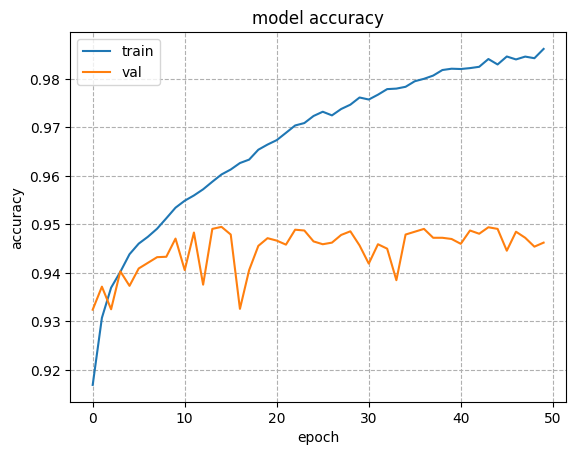

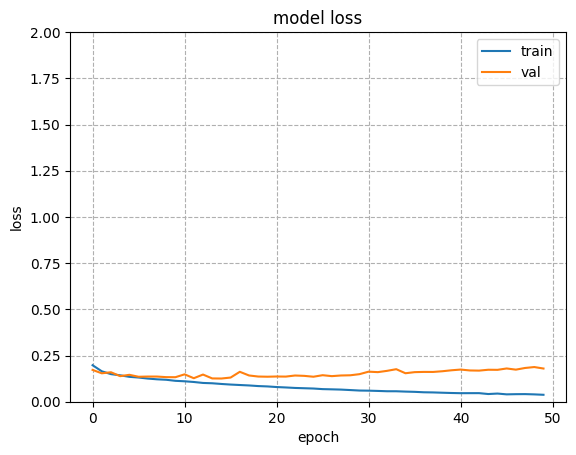

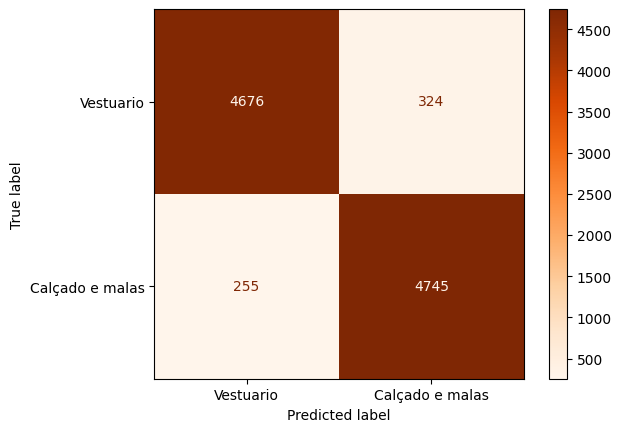

In [10]:


LABELS = ['Vestuario', 'Calçado e malas']
# gerar uma matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# mostrar figuras - accuracy, loss e matriz de confusão
plt.figure(num=1)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="upper left")
plt.grid(True, ls='--')

plt.figure(num=2)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylim(0, 2.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="upper right")
plt.grid(True, ls='--')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LABELS)
disp.plot(cmap=plt.colormaps['Oranges'])
plt.show()

In [11]:
np.where(y_pred == y_true, 1,0).sum()/y_pred.size  #accuracy

np.float64(0.9421)